# Working with Prudence regions

In [1]:
%load_ext autoreload
%autoreload 2

In [167]:
import cartopy.crs as ccrs

def plot(da, transform=ccrs.PlateCarree(), projection=ccrs.PlateCarree(), vmin=None, vmax=None, borders=True, 
         xlocs=range(-180,180,2), ylocs=range(-90,90,2), extent=None, figsize=(15,10), title=''):
    """plot a domain using the right projections and transformations with cartopy"""
    %matplotlib inline
    import cartopy.crs as ccrs
    import cartopy.feature as cf
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    ax = plt.axes(projection=projection)
    if extent:
        #ax.set_extent([ds_sub.rlon.min(), ds_sub.rlon.max(), ds_sub.rlat.min(), ds_sub.rlat.max()], crs=transform)
        ax.set_extent(extent, crs=projection)
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
                      xlocs=xlocs, ylocs=ylocs)
    da.plot(ax=ax, cmap='terrain', transform=transform, vmin=vmin, vmax=vmax)
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    if borders: ax.add_feature(cf.BORDERS)
    ax.set_title('')

In [150]:
import cordex as cx
cx.prudence.df

,name,west,east,south,north
area,,,,,
IP,Iberian Peninsula,-10,3,36,44
FR,France,-5,5,44,50
ME,Mid-Europe,2,16,48,55
AL,Alps,5,15,44,48
MD,Mediterranean,3,25,36,44
EA,Eastern Europe,16,30,44,55
NA,Northwestern Africa,-10,12,25,36
MI,Middle East,25,43,25,42
SC,Scandinavia,5,30,55,70


In [152]:
prudence = cx.prudence.regions()
prudence

<regionmask.Regions>
Name:     prudence regions

Regions:
0 IP   Iberian Peninsula
1 FR              France
2 ME          Mid-Europe
3 AL                Alps
4 MD       Mediterranean
5 EA      Eastern Europe
6 NA Northwestern Africa
7 MI         Middle East
8 SC         Scandinavia
9 BI       British Isles

[10 regions]

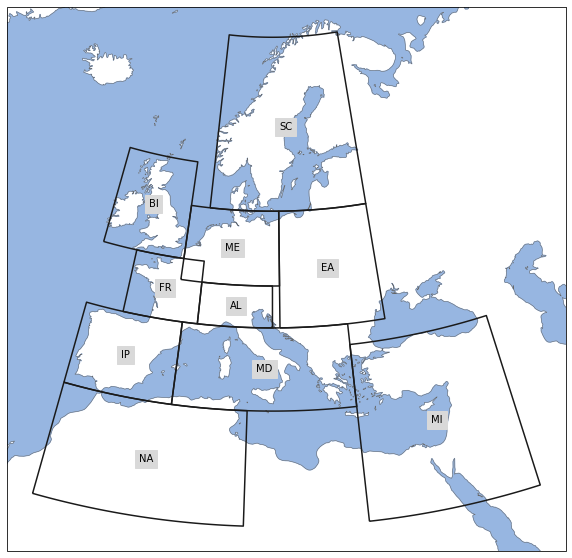

In [153]:
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
proj = ccrs.LambertConformal(central_longitude=15)
ax = prudence.plot(add_ocean=True, proj=proj, resolution="50m", label="abbrev")

In [87]:
eur11 = cx.cordex_domain('EUR-11', dummy='topo')
pole = (eur11.rotated_latitude_longitude.grid_north_pole_longitude, eur11.rotated_latitude_longitude.grid_north_pole_latitude)

helper function, see this [issue](https://github.com/regionmask/regionmask/issues/228)

In [156]:
mask = cx.prudence.mask_3D(eur11.lon, eur11.lat)

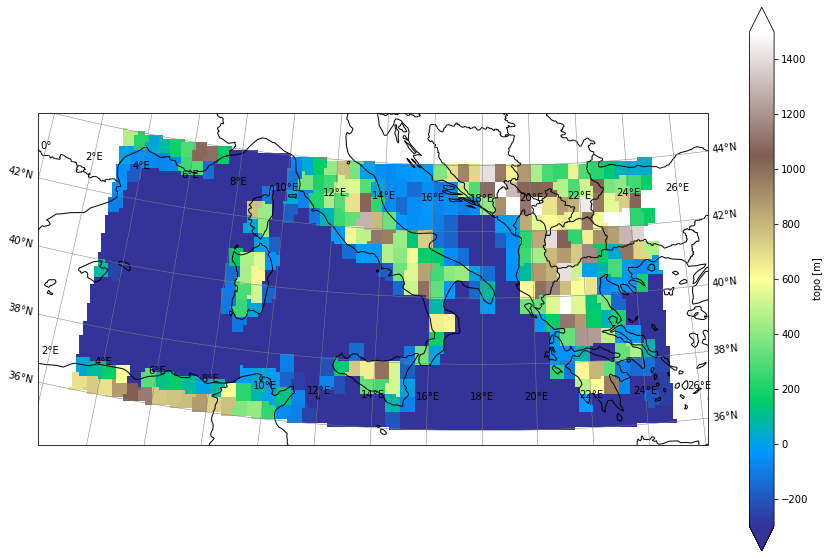

In [170]:
me_topo = eur11.topo.where(mask.isel(region=(mask.abbrevs == "MD")).squeeze(), drop=True)
plot(me_topo, transform=ccrs.RotatedPole(*pole), projection=ccrs.RotatedPole(*pole), vmin=-300, vmax=1500)